# **La librairie Pandas**

Pandas est une librairie python qui permet de manipuler des données en particulier au format csv.  
A partir d’un fichier csv, Pandas génère des tableaux de données (data-frames) avec des variables en  
colonnes et des individus en lignes :


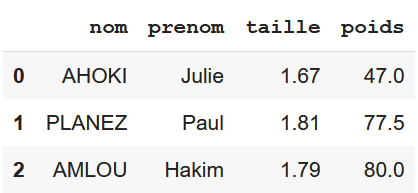





Il est alors possible d’afficher les données, de les manipuler, de les analyser en utilisant des programmes Python.


## **Un exemple élémentaire**

Dans la suite, nous utiliserons le fichier « titanic.csv » contenant des données relatives  
aux passagers du Titanic le jour de son naufrage.


### **I. Charger les données**

Lire le code et les commentaires puis exécuter la cellule ci-dessous.

In [2]:
import pandas as pd   
# import de pandas avec pour alias pd

url = 'http://perpendiculaire.fr/data/titanic.csv'
# adresse du fichier local ou distant

df = pd.read_csv(url,sep=';')
# lecture des données séparées ici par ; et création d'un data frame df
# dans la suite, nous travaillerons sur notre table de données "df"

**Remarque:**

le fichier de données peut être hébérgé gratuitement sur un compte github :    

- créer votre compte https://github.com ,  
- créer un nouveau dossier public nommé "donnees",  
- cliquer sur **Add file** puis **upload file** et enfin **commit changes**.    

Vous pouvez alors copier le lien vers votre fichier:  
https://raw.githubusercontent.com/ela1687/donnees/main/titanic.csv)

### **II. Observer les données**


###**1. Afficher les données** 

Les méthodes **head( )** et **shape** permettent d'afficher les données et de connaitre les dimensions de la table.  
  
Exécuter dans la cellule ci-dessous **df.head( )**, **df.head(7)** puis **df.shape** et observer les sorties obtenues.

In [4]:
df.head()

,classe,survie,nom,sexe,age,tarif
0,1,1,"Allen, Miss. Elisabeth Walton",2,29.0,211.0
1,1,1,"Allison, Master. Hudson Trevor",1,1.0,152.0
2,1,0,"Allison, Miss. Helen Loraine",2,2.0,152.0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0,152.0
4,1,0,"Allison, Mrs. Hudson Bessie Waldo Daniels",2,25.0,152.0


In [5]:
df.shape

(1309, 6)

On peut afficher tout ou partie des valeurs d'une colonne :

In [ ]:
df['tarif']     # toutes les valeurs indexeées de la colonne tarif

In [ ]:
df['age'][4]    # valeur de la colonne age d'index 4 (5 ième ligne des données)

In [ ]:
df['tarif'][4:12]  # tarifs de l'index 4 à 11  (5 ième à 12 ième ligne)

Les lignes du data frame sont indexées, 0, 1, 2 ...  
Exécuter la commande **df.index** ci-dessous:

In [ ]:
df.index

Nous pouvons donc accéder aux données de chaque colonne, chaque ligne, chaque "cellule".  
Il est donc possible d'utiliser les structures et les opérations Python habituelles   
(boucles, tests, opérations mathématiques ...) pour parcourir et travailler sur les données du data frame :

In [ ]:
for i in df.index:
    # cette boucle permet de parcourir toutes les lignes
    prix = df['tarif'][i]
    # tarif payé par le passager d'index i (ligne i)
    if prix > 500:
        print(prix)

###**2. Vérifier l'intégrité des données**

La méthode **count( )** renvoie le nombre de valeurs pour chacune des variables du data-frame.  
Cela permet de repérer les éventuelles valeurs manquantes :

In [ ]:
df.count()

On se rend compte que les colonnes age et tarif contiennent des données **non affectées** (valeurs manquantes).  
Nous allons supprimer les lignes correspondantes grâce à la méthode "**dropna( )**".

In [ ]:
df = df.dropna()
df.count()  # on vérifie ...

### **III. Calculer des paramètres statistiques.**



### **1. En utilisant les méthodes intégrées à Pandas**

L’instruction **df.describe( )** permet d'afficher les principaux paramètres statistiques des données quantitatives.  
En particulier la moyenne : mean et l'écart-type : std.

In [ ]:
df.describe()
# on applique ici describe() à l'ensemble des données "df"

describe( ) peut aussi opérer sur une seule colonne du data-frame:

In [ ]:
df['tarif'].describe()
# on applique ici describe() à la colonne 'tarif' du dataframe 'df'

L’instruction suivante **df[ 'survie' ].mean( )** renvoie la fréquence de survie.

In [ ]:
df['survie'].mean()

La méthode **query()** permet de filtrer les données selon les valeurs des variables.  
Déterminons à titre d'exemple, l'effectif des femmes puis l'effectif des femmes survivantes :

In [ ]:
eff_femme = df.query('sexe == 2').count()
# La méthode count() dénombre les données correspondantes pour chaque variable

eff_femme_et_survie = df.query('sexe == 2 and survie == 1').count()


proportion = eff_femme_et_survie / eff_femme

proportion

La méthode **groupeby()** permet de calculer des statistiques en regroupant les données selon une variable.  
La variable 'sexe' prend deux valeur 1 pour les hommes et 2 pour les femmes.  
Ainsi, df.groupby('sexe').mean() renvoie les moyennes des variables pour les deux groupe sexe 1 et 2 :

In [ ]:
statsparsexe = df.groupby('sexe').mean()
statsparsexe

### **2. Sans utiliser les méthodes intégrées à Pandas**

Il est possible de calculer nos statistiques de façon explicite en utilisant les opérations et les structures usuelles de python. 

**Exemple 1: calcul de l'âge moyen des passager**

In [ ]:
def moyenne(colonne):
  S = 0.0
  for valeur in colonne:
      S = S + valeur
  return S / len(colonne)

moyenne(df['age'])
# on appelle la fonction pour la colonne age

**Exemple 2: retrouvons, de façon explicite, le nombre de femmes**

In [ ]:
def effectif_femmes():
    eff_femmes = 0
    for i in df.index:
       if df['sexe'][i] == 2:
          eff_femmes = eff_femmes + 1
    return eff_femmes

effectif_femmes()

**Exemple 3: retrouvons, de façon explicite, la proportion de femmes ayant survécu**

In [ ]:
def freqsurvie():
    S = 0
    for i in df.index:
        if df['sexe'][i] == 2 and df['survie'][i] == 1 :
           S = S + 1
    return S/388
    
freqsurvie()

### **IV. Représenter les données.**

**Diagramme en barres**

Lire le code et les commentaires puis exécuter la cellule ci-dessous:

In [ ]:
import matplotlib.pyplot as plt

df.hist(column = 'tarif', bins = 15)
# on a choisi de représenter la variable "tarif" du dataframe

plt.title("Répartition des passagers par classes")

plt.show()


**Diagramme circulaire**

Lire le code et les commentaires puis exécuter la cellule ci-dessous.

In [1]:
# détermination du nombres de passagers par classe (1, 2 ou 3 ième classe)
effectif_c1 = df.query('classe == 1').classe.count()
effectif_c2 = df.query('classe == 2').classe.count()
effectif_c3 = df.query('classe == 3').classe.count()

repartition = [effectif_c1, effectif_c2, effectif_c3]
classes = [1,2,3]

plt.pie(repartition,  labels = classes)
plt.title("Répartition des passagers par classes")
plt.show()

NameError: name 'df' is not defined

**Diagramme en boîte**

Lire le code et les commentaires puis exécuter la cellule ci-dessous.

In [ ]:
df.boxplot(column = 'age', grid = True)
# On demande le diagramme en boîte pour la colonne age